In [31]:
import pandas as pd
import json
from pandas import json_normalize
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:

# Path to the actual data CSV file
csv_file_path = r'C:\Users\erdem\Downloads\archive\Life Expectancy Data.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the data
print(df.head())


       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [35]:
# Check the structure of the loaded data
print(df.info())
print(df.describe())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [37]:
print(df.describe())



              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

In [39]:
#Handle missing values
df.isnull().sum()


Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [41]:
# Drop rows with any missing values
# data_df.dropna(inplace=True)


# Fill missing values for numerical columns with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Fill missing values for categorical columns with mode
categorical_columns = ['Country', 'Status', 'infant deaths', 'under-five deaths']
for col in categorical_columns:
    if col in df.columns:
        most_frequent_value = df[col].mode()[0]
        df[col] = df[col].fillna(most_frequent_value)


Exploratory Data Analysis (EDA)



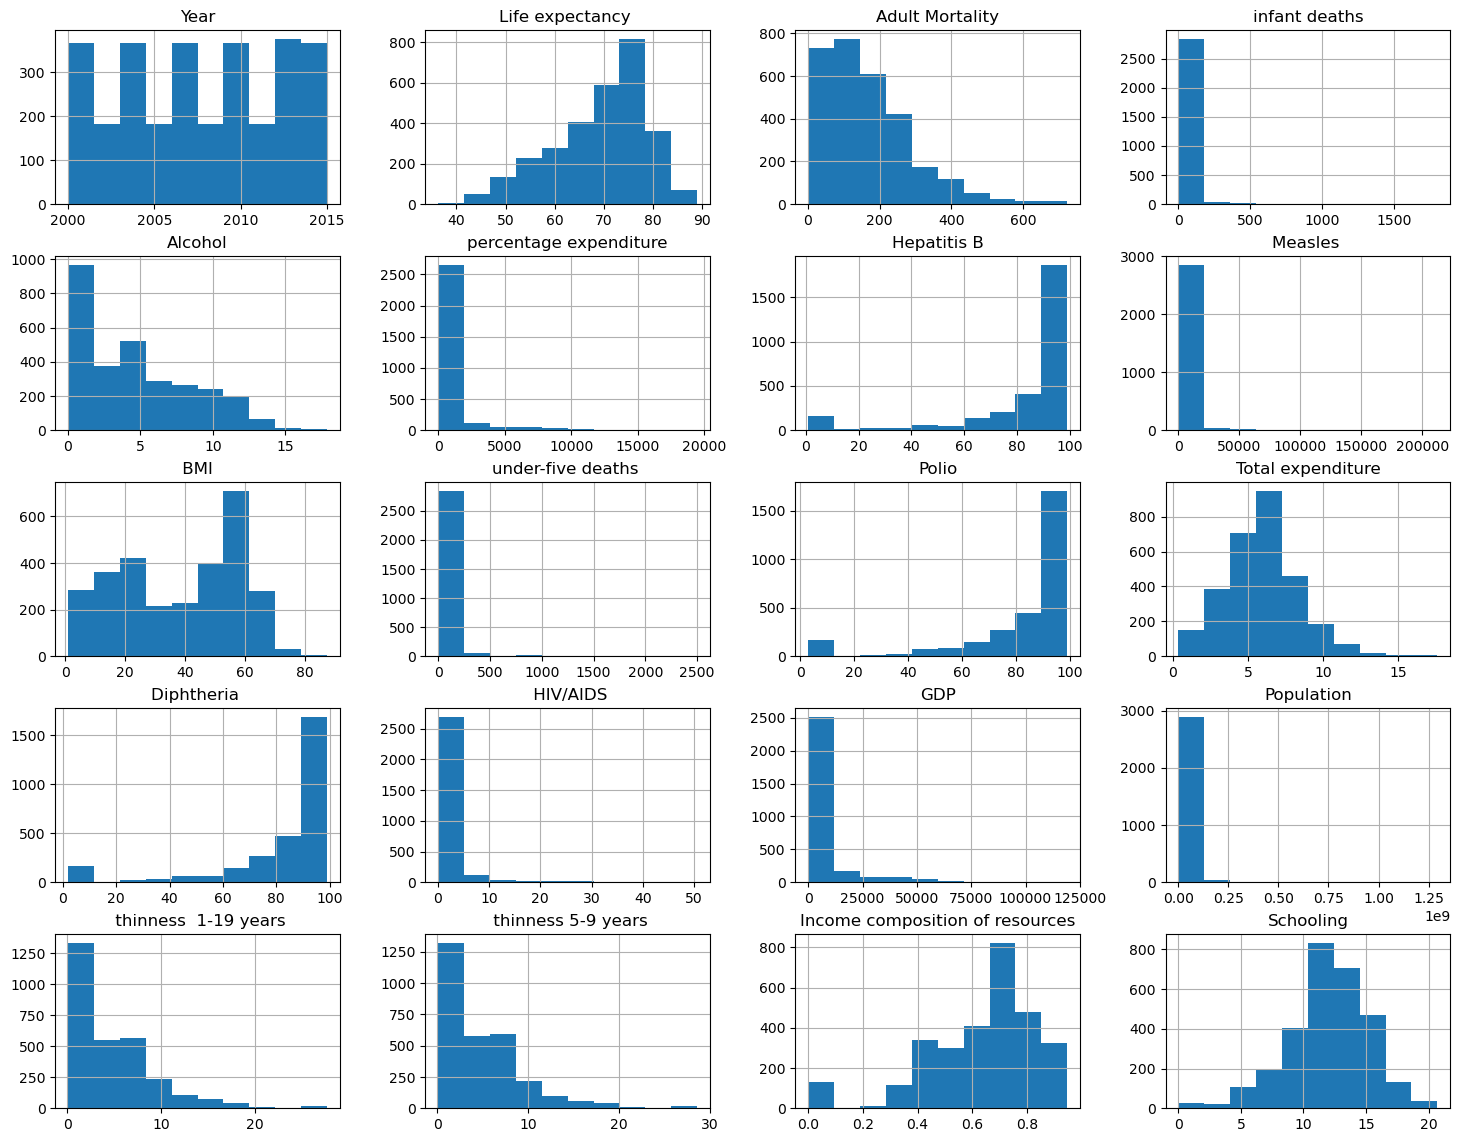

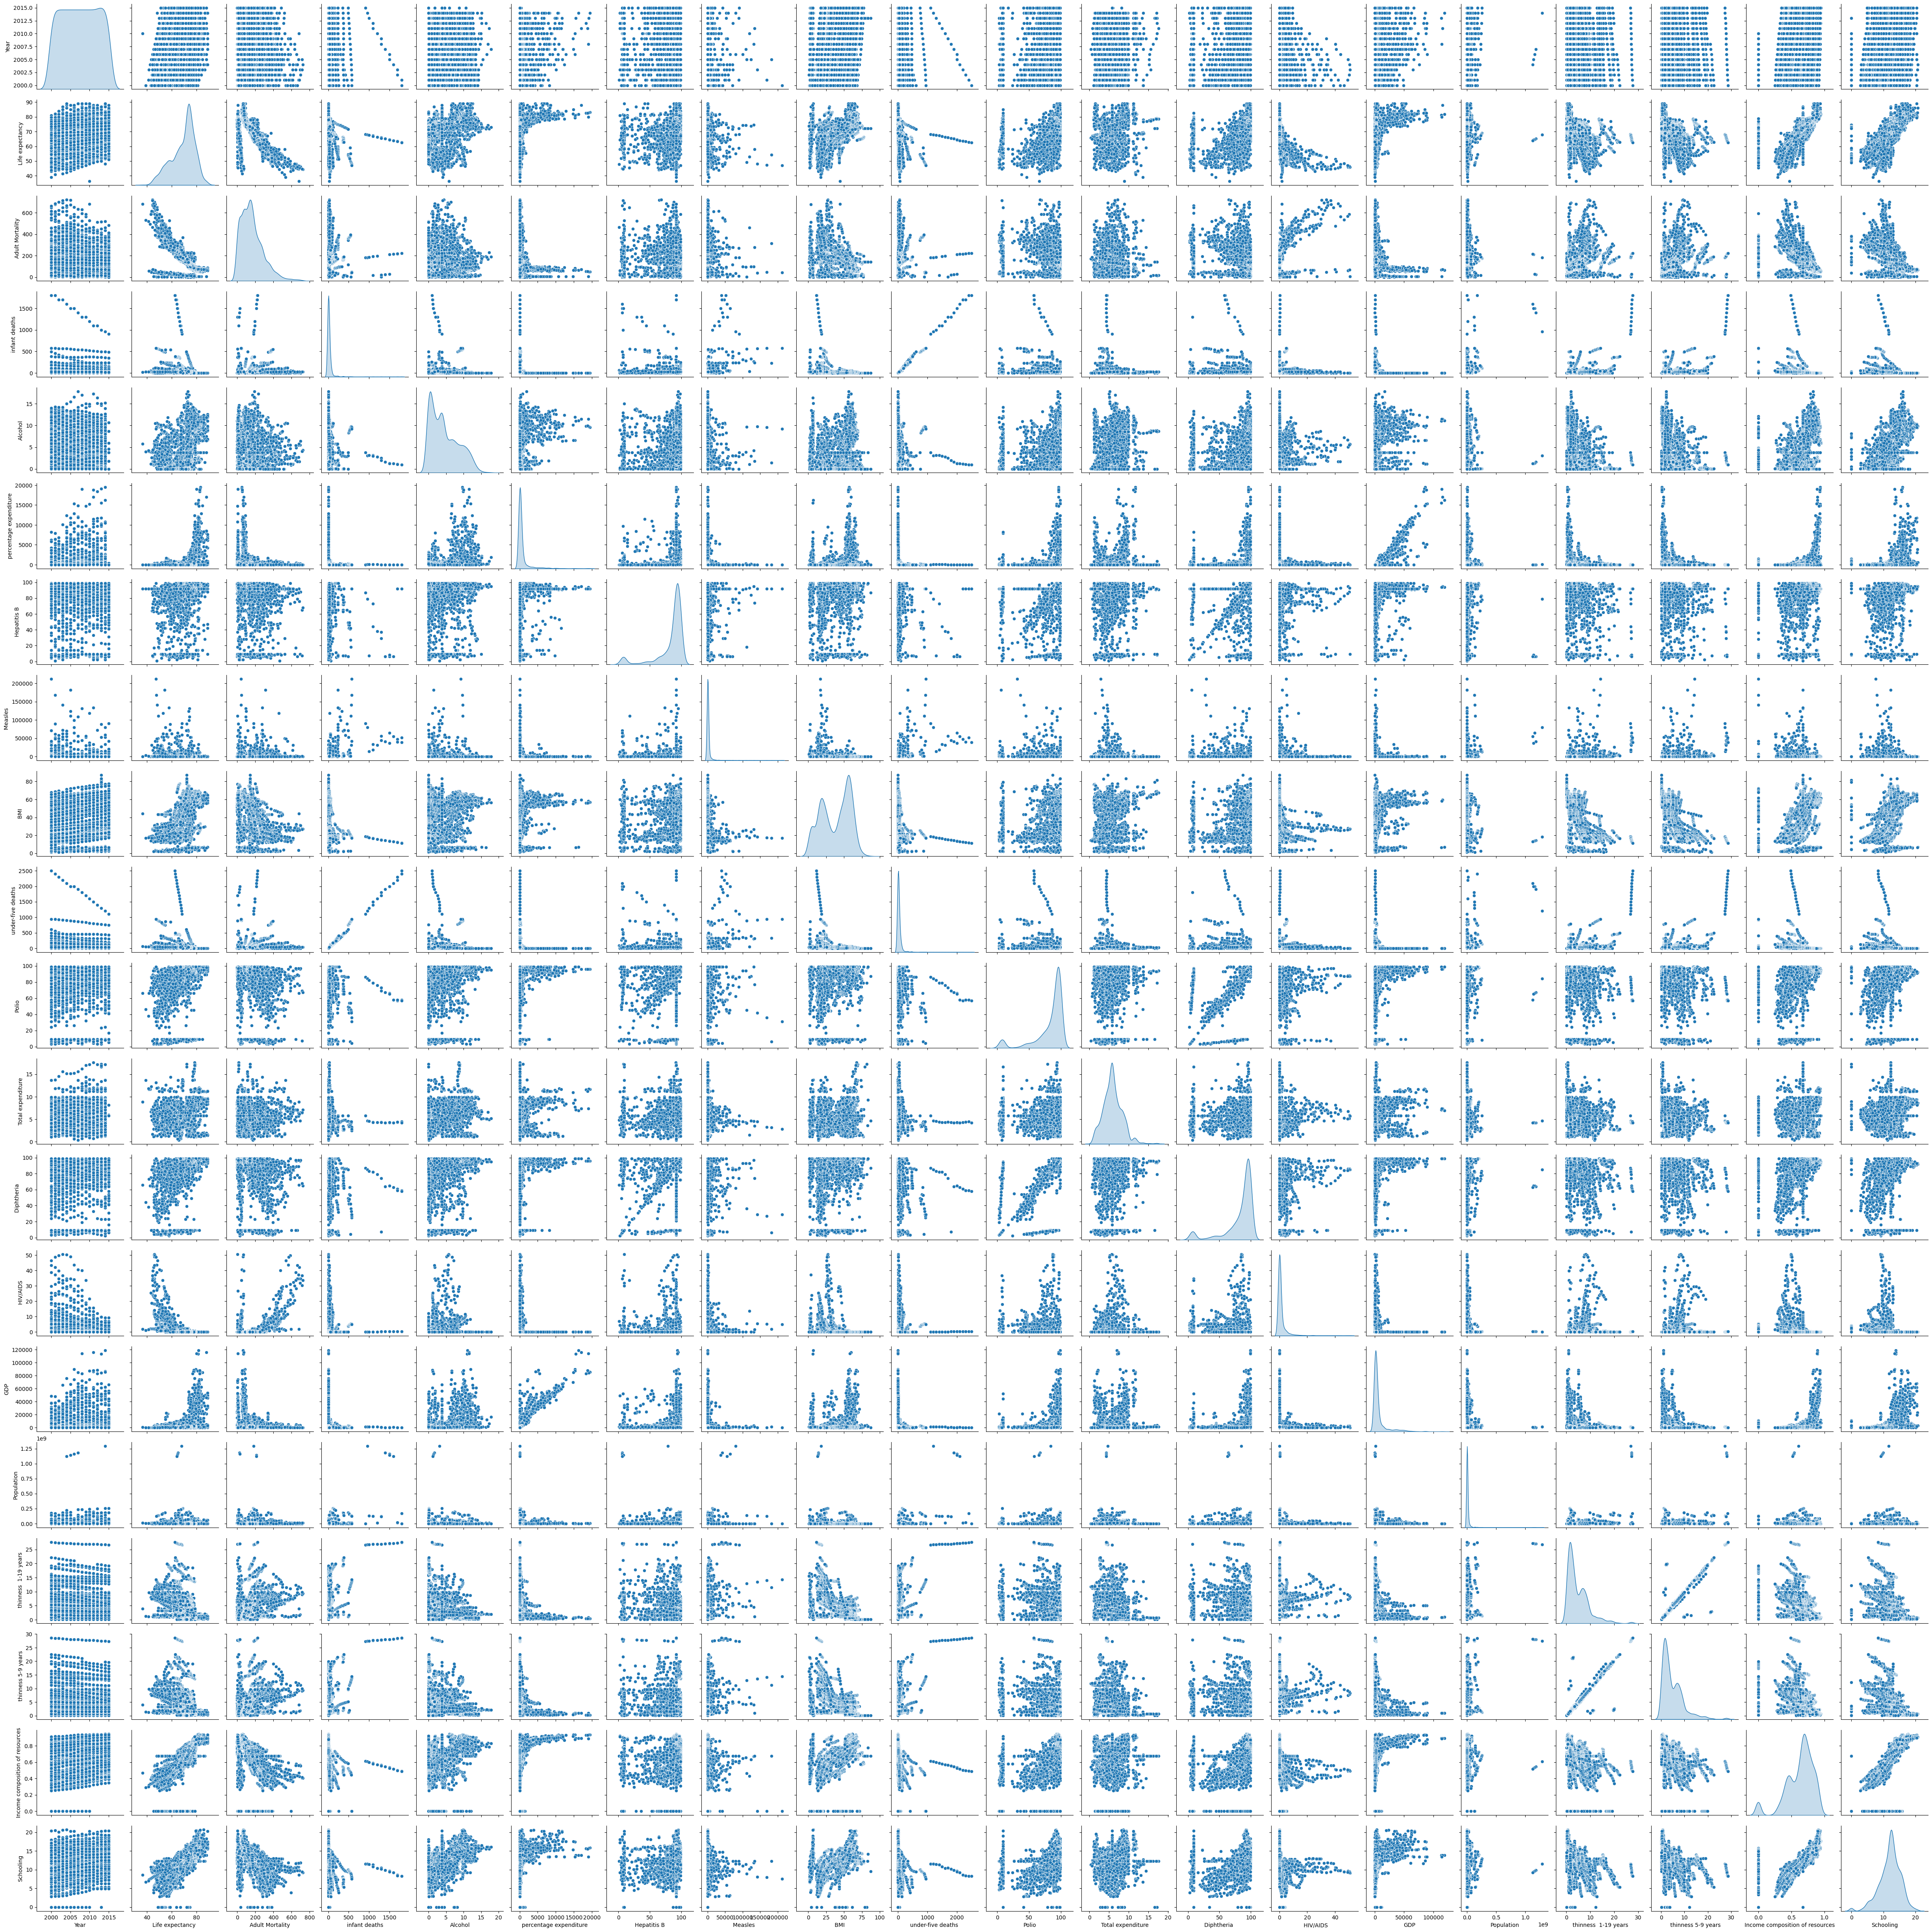

In [44]:
# Plot histograms for numerical columns
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(18, 14))
plt.show()

# Scatter plot to examine relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

In [104]:
print(df.describe())


              Year  Life expectancy  Adult Mortality  infant deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.234717       164.725664      30.303948   
std       4.613841         9.509115       124.086215     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.546875              738.251295    83.022124    2419.592240   
std       3.921946             1987.914858    22.996984   11467.272489   
min       0.010000                0.000000     1.000000       0.

Correlation Analysis

In [ ]:
#Analyze correlations between numerical features to understand relationships and potential collinearity.

#Filter numerical columns
# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#Handle non numeric columns: encoding or transforming them into numeric values
from sklearn.preprocessing import LabelEncoder

# Example of label encoding for categorical columns
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

# For more complex cases, you might use one-hot encoding
df = pd.get_dummies(df, columns=['Status'])



In [ ]:
# Check data types
print(df.dtypes)


In [ ]:
# Identify non-numeric columns, review missing data
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)


Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical data
scaled_data = scaler.fit_transform(numerical_df)

# If you want to keep the data as a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)


Splitting the Data

In [67]:
print(df.columns)
#Fixing the trailing spaces
df.columns = df.columns.str.strip()


Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [69]:
#'Life expectancy' is the target variable you want to predict
X = df.drop('Life expectancy', axis=1)  # Features
y = df['Life expectancy']  # Target

# Split the data into training and testing sets, 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [71]:
#one-hot encoding or label encoding to convert categorical variables into a numeric format.
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# List of categorical columns to encode
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

# Apply one-hot encoding
column_transformer = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), categorical_columns)
], remainder='passthrough')

# Transform the data
X_encoded = column_transformer.fit_transform(X)



In [73]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [75]:
#Now that all features are numeric, you can apply scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler with with_mean=False
scaler = StandardScaler(with_mean=False)

# Fit and transform the training data, transform the testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Training a Model with Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3.6637536757244487
R^2 Score: 0.957726259903801


#Evaluate Model Performance with these: Mean Squared Error (MSE), R^2 Score

In [96]:
#interpret the model's coefficients to understand the influence of each feature on life expectancy
coefficients = model.coef_
intercept = model.intercept_

feature_coefficients = zip(X_train_encoded.columns, coefficients)

for feature, coef in feature_coefficients:
    print(f"{feature}: {coef}")


Year: 1.2116394339629586
Adult Mortality: -0.28535338571019264
infant deaths: 8.722684267250974
Alcohol: -0.26404616888091637
percentage expenditure: 0.2595472579394061
Hepatitis B: -0.13275247760674863
Measles: -0.11263389271850421
BMI: -0.10196260346168717
under-five deaths: -8.741399521371845
Polio: 0.07332681028923871
Total expenditure: -0.1094110895701883
Diphtheria: 0.1861651429707163
HIV/AIDS: -1.689673517387878
GDP: -0.17459317247913608
Population: -0.056686281045300824
thinness  1-19 years: 0.08938747252505186
thinness 5-9 years: 0.14240785287575797
Income composition of resources: -0.03528426550928776
Schooling: 0.48088808611473277
Country_Albania: 1.2840034551707118
Country_Algeria: 1.0320264860582307
Country_Angola: -0.49223142033468326
Country_Antigua and Barbuda: 1.290311791455139
Country_Argentina: 1.2149236925514117
Country_Armenia: 1.0222389176031452
Country_Australia: 0.8614443931600475
Country_Austria: 0.823168258602897
Country_Azerbaijan: 0.926292313194128
Country_B

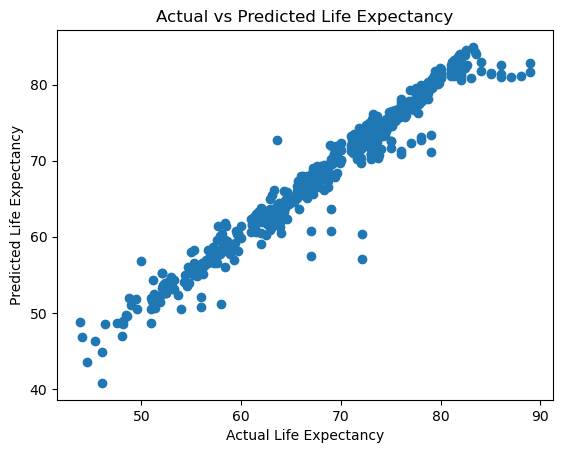

In [98]:
#Create a scatter plot to visualize the actual vs. predicted life expectancy
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()


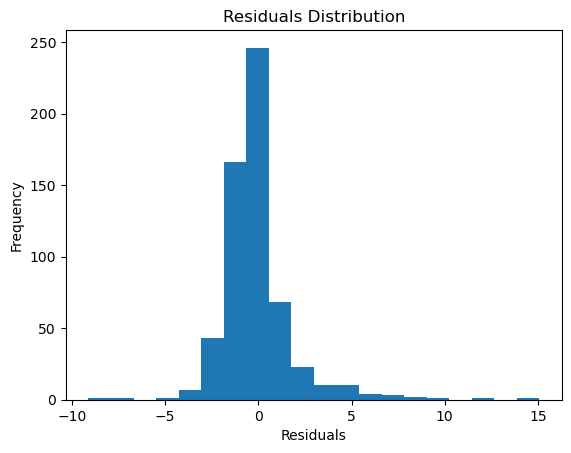

In [100]:
#analyze the residuals (the differences between actual and predicted values) to see if there are patterns that might suggest improvements
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
